### Importação dos dados



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


# Adicionar uma coluna para identificar cada loja
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinar todos os dados em um único DataFrame
dados_combinados = pd.concat([loja1, loja2, loja3, loja4])




#1. Análise do faturamento


In [ ]:
vendas_loja1 = loja1['Preço'].sum()
vendas_loja2 = loja2['Preço'].sum()
vendas_loja3 = loja3['Preço'].sum()
vendas_loja4 = loja4['Preço'].sum()

dif = vendas_loja1 - vendas_loja4
print(f'A diferença entre vendas da loja 1 e 4 foi de: {(dif*100)/vendas_loja1:.2f}%')

print(f'O faturamento da loja 1 foi de: R${vendas_loja1}')
print(f'O faturamento da loja 2 foi de: R${vendas_loja2}')
print(f'O faturamento da loja 3 foi de: R${vendas_loja3}')
print(f'O faturamento da loja 4 foi de: R${vendas_loja4}')

A diferença entre vendas da loja 1 e 4 foi de: 9.78%
O faturamento da loja 1 foi de: R$1534509.12
O faturamento da loja 2 foi de: R$1488459.06
O faturamento da loja 3 foi de: R$1464025.03
O faturamento da loja 4 foi de: R$1384497.58


Nesta etapa percebemos que a loja que faturou menos foi a de número 4, apresentando uma diferença de quase 10% em comparação a loja 1 que apresentou o maior faturamento.

# 2. Vendas por Categoria


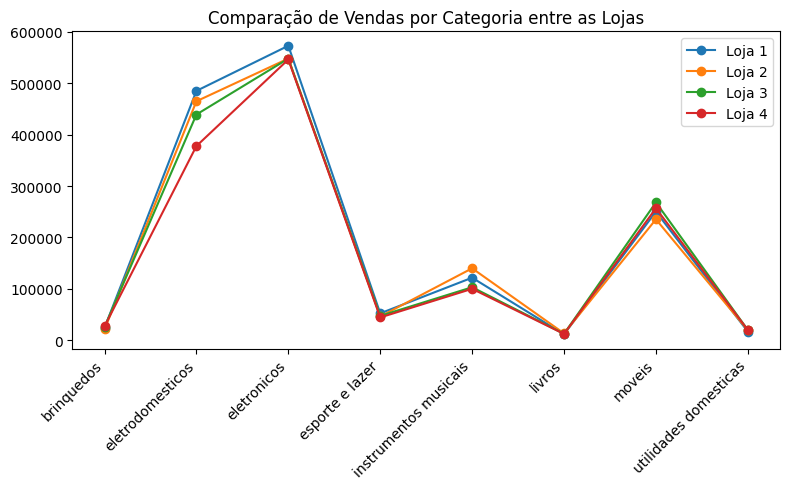

In [ ]:
# Function to prepare the data for plotting
def prepare_data(df, loja_name):
  """Groups data by product category and sums sales, adds loja column"""
  sales_by_category = df.groupby("Categoria do Produto")["Preço"].sum().reset_index()
  sales_by_category["loja"] = loja_name
  return sales_by_category


# Vendas por categoria entre as lojas:
sales_data = pd.concat([
    prepare_data(loja1, "Loja 1"),
    prepare_data(loja2, "Loja 2"),
    prepare_data(loja3, "Loja 3"),
    prepare_data(loja4, "Loja 4")
])


plt.figure(figsize=(8, 5))
colors = ['#FF8383', '#FFF574', '#A1D6CB', '#A19AD3']
for loja in sales_data["loja"].unique():
    loja_data = sales_data[sales_data["loja"] == loja]
    plt.plot(loja_data["Categoria do Produto"], loja_data["Preço"], label=loja, marker='o')

plt.title("Comparação de Vendas por Categoria entre as Lojas")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
#numero de vendas por categoria
vendas_loja1 = loja1.groupby("Categoria do Produto").size()
vendas_loja2 = loja2.groupby("Categoria do Produto").size()
vendas_loja3 = loja3.groupby("Categoria do Produto").size()
vendas_loja4 = loja4.groupby("Categoria do Produto").size()


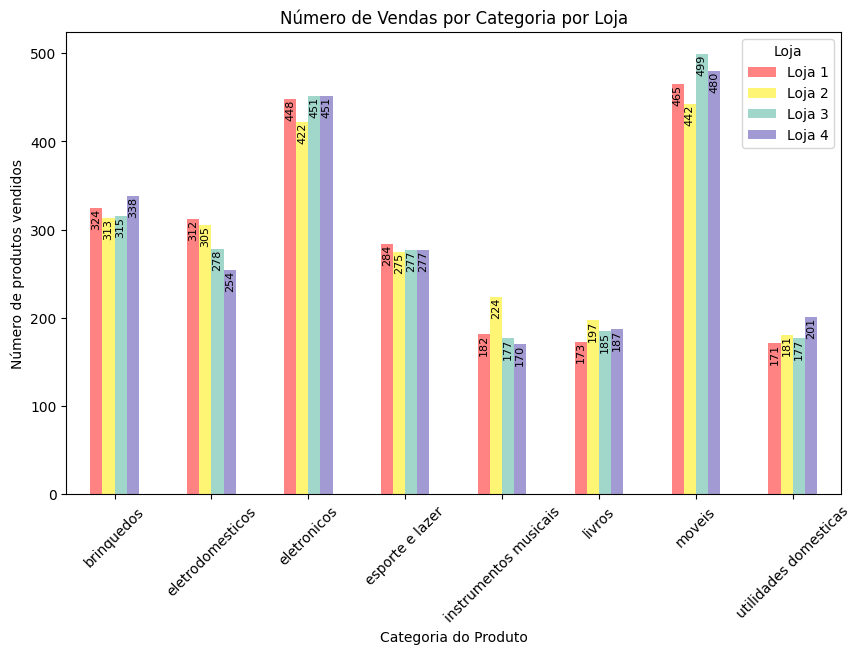

In [ ]:
#gráfico mostrando numero de vendas por categoria por loja

# Calcular o número de vendas por categoria para cada loja
vendas_por_categoria_loja = dados_combinados.groupby(['Categoria do Produto', 'Loja']).size().unstack()

# Plotar o gráfico de barras agrupadas
ax = vendas_por_categoria_loja.plot(kind='bar', figsize=(10, 6), color = colors)
colors = ['#FF8383', '#FFF574', '#A1D6CB', '#A19AD3']
plt.ylabel('Número de produtos vendidos')
plt.title('Número de Vendas por Categoria por Loja')
plt.xticks(rotation=45)
plt.legend(title='Loja')

for p in ax.patches:
  ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
  ha='center', va='top', fontsize=8, color='black', rotation=90)




# Mostrar o gráfico
plt.show()

In [ ]:
def prepare_data(df, loja_name):
  """Groups data by product category and sums sales, adds loja column"""
  sales_by_category = df.groupby("Categoria do Produto")["Preço"].sum().reset_index()
  sales_by_category["loja"] = loja_name
  return sales_by_category

  sales_data = pd.concat([
    prepare_data(loja1, "Loja 1"),
    prepare_data(loja2, "Loja 2"),
    prepare_data(loja3, "Loja 3"),
    prepare_data(loja4, "Loja 4")
  ])

  print(sales_data)


Ao analisar as vendas por categoria vemos que os destaques nas vendas são os seguintes:
- A loja 4 se para Utilidades domésticas e Brinquedos.
- A loja 1 para eletrodomésticos
- A loja 2 para Livros e Instrumentos Musicais
- Loja 3 para móveis.
- A loja 4 teve o menor número de vendas na categoria Eletrônicos.

Ainda, vemos que o maior faturamento se da nas categorias Eletronicos e Eletrodomésticos. Por isso a Loja 4 tem o menor faturamento mesmo tendo sido líder em duas outras categorias.

# 3. Média de Avaliação das Lojas

In [ ]:
# calcular media nas avaliaçoes das compras


media_loja1 = loja1['Avaliação da compra'].mean()
media_loja2 = loja2['Avaliação da compra'].mean()
media_loja3 = loja3['Avaliação da compra'].mean()
media_loja4 = loja4['Avaliação da compra'].mean()

print(media_loja1)
print(media_loja2)
print(media_loja3)
print(media_loja4)





3.976685036032217
4.037303942348453
4.048325561678677
3.9957591178965224


'"\nplt.figure(figsize=(6, 4))  # Ajustando o tamanho da figura\nplt.plot(lojas, medias, marker=\'o\', linestyle=\'--\', color=\'b\')\nplt.ylim(0, 5)  # Mantendo o limite do eixo Y\n\nplt.show()\n'

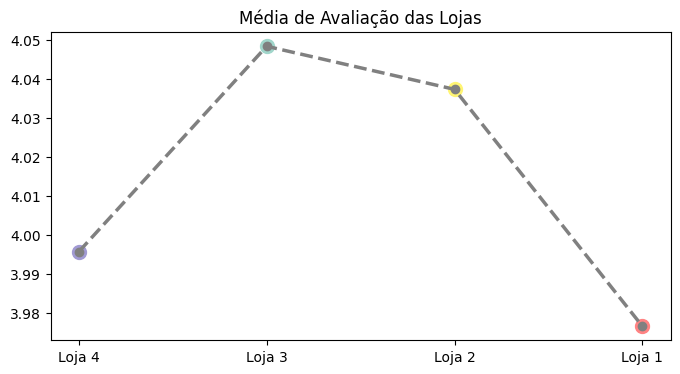

In [ ]:
lojas = ['Loja 4', 'Loja 3', 'Loja 2', 'Loja 1']
medias = [media_loja4, media_loja3, media_loja2, media_loja1]
colors = ['#A19AD3', '#A1D6CB', '#FFF574', '#FF8383']
plt.figure(figsize=(8, 4))
plt.title('Média de Avaliação das Lojas')
# Plotando as linhas
plt.plot(lojas, medias, marker='o', linestyle='--', linewidth=2.5, color='gray')
# Plotando os pontos com cores diferentes
for i in range(len(lojas)):
  plt.scatter(lojas[i], medias[i], color=colors[i], s=100)
# s é o tamanho dos pontos

""""
plt.figure(figsize=(6, 4))  # Ajustando o tamanho da figura
plt.plot(lojas, medias, marker='o', linestyle='--', color='b')
plt.ylim(0, 5)  # Mantendo o limite do eixo Y

plt.show()
"""


Na média de Avaliaçao das lojas vemos que a loja 3 fica em primeiro lugar, a loja 1 tem a pior média e a loja 4 tem a segunda pior média.

# 4. Produtos Mais e Menos Vendidos

In [ ]:
import plotly.graph_objects as go
# produtos mais vendidos todas lojas
produtos_mais_vendidos = dados_combinados.groupby('Produto')['Preço'].sum().sort_values(ascending=False)

#categoria que mais/menos gera lucro
categoria_mais_vendida = dados_combinados.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

# Gráfico
paleta = ['#FF0060', '#0079FF', '#F6FA70', '#00DFA2', '#FFAA80', '#7C00FE', '#836FFF', '#00FF9C']
graph = go.Figure(data = go.Pie(labels=categoria_mais_vendida.index, values=categoria_mais_vendida.values, marker_colors = paleta, hole = 0.5, showlegend = False))
graph.update_traces(textposition='outside', textinfo='percent+label')
graph.update_layout(title={'text': "Categoria com maior faturamento",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, width=700,height=400)
graph.show()

In [ ]:
# qual item é mais vendido
produtos1 = loja1['Produto'].value_counts()
print(produtos1)

# categoria mais vendida da Loja 1
categoria_mais_vendida1 = loja1.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print(categoria_mais_vendida1)
"""
loja1_mais_vende = ['Micro-ondas','TV Led UHD 4K','Guarda roupas']
loja2_mais_vende = ['Micro-ondas','Iniciando em programação','Bateria']
loja3_mais_vende = ['Kit banquetas','Mesa de jantar','Cama king']
loja4_mais_vende = ['Faqueiro','Cama box','Dashboards com Power BI']
"""

Produto
Micro-ondas                    60
TV Led UHD 4K                  60
Guarda roupas                  60
Secadora de roupas             58
Cômoda                         56
Blocos de montar               56
Bola de basquete               55
Bicicleta                      54
Copo térmico                   54
Geladeira                      54
Impressora                     54
Bateria                        53
Faqueiro                       52
Carrinho controle remoto       52
Modelagem preditiva            51
Fone de ouvido                 50
Xadrez de madeira              49
Celular Plus X42               49
Lava louças                    48
Lavadora de roupas             47
Guitarra                       47
Violão                         46
Sofá retrátil                  46
Cadeira de escritório          46
Fogão                          45
Cama box                       44
Kit banquetas                  44
Smart TV                       44
Cama king                      44
Cubo m

"\nloja1_mais_vende = ['Micro-ondas','TV Led UHD 4K','Guarda roupas']\nloja2_mais_vende = ['Micro-ondas','Iniciando em programação','Bateria']\nloja3_mais_vende = ['Kit banquetas','Mesa de jantar','Cama king']\nloja4_mais_vende = ['Faqueiro','Cama box','Dashboards com Power BI']\n"

In [ ]:
produtos2 = loja2['Produto'].value_counts()
print(produtos2)

# categoria mais vendida da Loja 2
categoria_mais_vendida2 = loja2.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print(categoria_mais_vendida2)

Produto
Iniciando em programação       65
Micro-ondas                    62
Bateria                        61
Violão                         58
Pandeiro                       58
Secadora de roupas             57
Celular Plus X42               55
Blocos de montar               54
Guarda roupas                  54
Jogo de panelas                52
Corda de pular                 50
Lavadora de roupas             49
Cadeira de escritório          49
Geladeira                      49
Boneca bebê                    48
Carrinho controle remoto       47
Guitarra                       47
Cama box                       47
Copo térmico                   47
Modelagem preditiva            46
Bola de vôlei                  46
Jogo de copos                  46
Lava louças                    46
Kit banquetas                  45
Cama king                      45
Bicicleta                      45
Mochila                        45
Cubo mágico 8x8                45
Xadrez de madeira              45
Mesa d

In [ ]:
produtos3 = loja3['Produto'].value_counts()
print(produtos3)

# categoria mais vendida da Loja 3
categoria_mais_vendida3 = loja3.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print(categoria_mais_vendida3)

Produto
Kit banquetas                  57
Mesa de jantar                 56
Cama king                      56
Jogo de panelas                55
Cômoda                         55
Smart TV                       54
Fogão                          53
Corda de pular                 53
Modelagem preditiva            53
Carrinho controle remoto       52
Lava louças                    52
Bicicleta                      52
Jogo de tabuleiro              52
Pandeiro                       51
Impressora                     50
Geladeira                      50
Bola de basquete               50
Guarda roupas                  49
Bola de vôlei                  48
Tablet ABXY                    48
Poltrona                       47
Violão                         47
Panela de pressão              47
Xadrez de madeira              47
Ciência de dados com python    46
Celular Plus X42               46
Dinossauro Rex                 46
Cadeira de escritório          46
Smartwatch                     46
Cama b

In [ ]:
produtos4 = loja4['Produto'].value_counts()
print(produtos4)

# categoria mais vendida da Loja 4
categoria_mais_vendida4 = loja4.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print(categoria_mais_vendida4)

Produto
Cama box                       62
Faqueiro                       59
Dashboards com Power BI        56
Cama king                      56
Carrinho controle remoto       55
Mesa de jantar                 55
Cômoda                         55
Smart TV                       54
Blocos de montar               54
Pandeiro                       52
Impressora                     50
Modelagem preditiva            50
Assistente virtual             50
Jogo de panelas                50
Bola de basquete               50
Copo térmico                   48
Celular Plus X42               48
Boneca bebê                    48
Bateria                        48
Bola de vôlei                  48
Jogo de tabuleiro              48
Micro-ondas                    48
Fogão                          47
Cubo mágico 8x8                47
Sofá retrátil                  47
Dinossauro Rex                 47
Panela de pressão              46
Jogo de copos                  46
Tablet ABXY                    45
Poltro

# 5. Frete Médio por Loja


In [ ]:
#frete médio por loja

frete_loja1 = loja1['Frete'].mean()
frete_loja2 = loja2['Frete'].mean()
frete_loja3 = loja3['Frete'].mean()
frete_loja4 = loja4['Frete'].mean()

print(frete_loja1)
print(frete_loja2)
print(frete_loja3)
print(frete_loja4)

34.69180491551149
33.62194065817927
33.07446427411743
31.278997081841727


# RELATÓRIO DE CONCLUSÃO

Nesta etapa percebemos que a loja que faturou menos foi a de número 4, apresentando uma diferença de quase 10% em comparação a loja 1 que apresentou o maior faturamento.

A diferença entre vendas da loja 1 e 4 foi de: 9.78%
* O faturamento da loja 1 foi de: R\$ 1.534.509,12
* O faturamento da loja 2 foi de: R\$ 1.488.459,06
* O faturamento da loja 3 foi de: R\$ 1.464.025,03
* O faturamento da loja 4 foi de: R\$ 1.384.497,58
-----
Ao analisar as vendas por categoria vemos que os destaques nas vendas são os seguintes:
- A loja 4 para Utilidades domésticas e Brinquedos;
- A loja 1 para eletrodomésticos;
- A loja 2 para Livros e Instrumentos Musicais;
- Loja 3 para móveis;
- A loja 4 teve o menor número de vendas na categoria Eletrônicos.

Ainda, vemos que o maior faturamento se da nas categorias Eletrônicos e Eletrodomésticos. Por isso a Loja 4 tem o menor faturamento mesmo tendo sido líder em duas outras categorias.

-----
Na média de Avaliaçao das lojas vemos que a loja 3 fica em primeiro lugar, a loja 1 tem a pior média e a loja 4 tem a segunda pior média.

----

Na análise das vendas por categoria a loja 2 é a que menos vende nas categorias Brinquedos, Eletrodomesticos, Esporte e Móveis. Porém é a segunda colocada em Faturamento total.

Em todas as 4 lojas os produtos mais vendidos estão nas categorias de Móveis e Eletrônicos, cada um chegando próximo de 500 itens por loja no período analisado.

_______
Frete médio por loja

A loja 1 apresentou maior valor médio por frete, o que caberia uma análise mais detalhada sobre a logística.
________

Conclusão

Sendo assim, recomendamos a venda da Loja 4 devido seu menor faturamento total em relação as outras lojas, baixa média de avaliação









